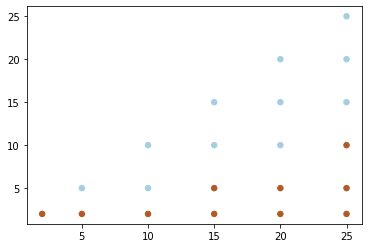

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from skimage import measure
from sklearn.datasets import make_blobs, make_circles

from tikzplotlib import save as tikz_save
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

#rs = np.random.RandomState(1234)
import pandas as pd
# Generate some fake data.
#n_samples = 200
dataset = pd.read_csv('/home/inlab/Downloads/Endorserdataset.csv')
# X is the input features by row.
#X = np.zeros((200,3))
#X[:n_samples//2] = rs.multivariate_normal( np.ones(3), np.eye(3), size=n_samples//2)
#X[n_samples//2:] = rs.multivariate_normal(-np.ones(3), np.eye(3), size=n_samples//2)
# Y is the class labels for each row of X.
#X = dataset.drop(['Endorsing','MaxDelay','IsTrustable'], axis=1)
X = dataset[['NoPeers','Endorsing', 'AvgDelay']]   # we only take the first three features.
y = dataset['IsTrustable']

X.head()
y.head()

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)



ValueError: X.shape[1] = 2 should be equal to 3, the number of features at training time

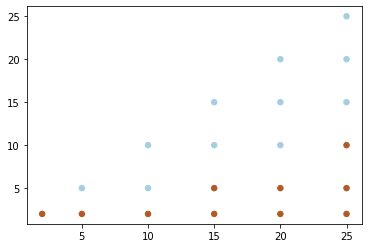

In [3]:
#X = dataset[['NoPeers','MinDelay', 'AvgDelay']]   # we only take the first three features.
X = dataset[['NoPeers','Endorsing', 'AvgDelay']]   # we only take the first three features.

y = dataset['IsTrustable']

clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--','-','--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

<ipython-input-6-6a03a480c5c7>:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')
<ipython-input-6-6a03a480c5c7>:32: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(Z,0, spacing=(1, 1, 1), step_size=2)


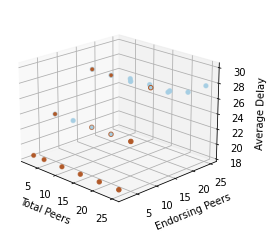

In [6]:
X = dataset[['NoPeers','Endorsing', 'AvgDelay']]   # we only take the first three features.
y = dataset['IsTrustable']
#r = np.exp(-(X ** 2).sum(1))
fig = plt.figure()
ax = plt.axes(projection ="3d")

# creating scatter plot
ax.scatter3D(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c = y, cmap=plt.cm.Paired)

clf2 = svm.SVC(kernel='rbf', C=1000)
clf2.fit(X, y)

z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
#verts, faces, _, _ = measure.marching_cubes_lewiner(Z)
verts, faces, _, _ = measure.marching_cubes_lewiner(Z,0, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.set_xlabel('Total Peers')
ax.set_ylabel('Endorsing Peers')
ax.set_zlabel('Average Delay')
ax.view_init(20, -45)
plt.savefig('kerneltrick')

<ipython-input-7-a6dbb27f6617>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')
<ipython-input-7-a6dbb27f6617>:26: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 1, spacing=(1, 1, 1), step_size=2)


ValueError: Surface level must be within volume data range.

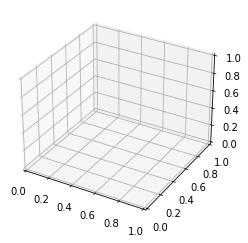

In [7]:
X = dataset[['NoPeers','Endorsing', 'AvgDelay']]    # we only take the first three features.
y = dataset['IsTrustable']
clf2 = svm.SVC(kernel='rbf', C=1000)
clf2.fit(X, y)


z = lambda x,y: (-clf2.intercept_[0]-clf2.coef_[0][0]*x-clf2.coef_[0][1]*y) / clf2.coef_[0][2]

ax = plt.gca(projection='3d')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
zlim = ax.get_zlim()

### from here i don't know what to do ###
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
zz = np.linspace(zlim[0], zlim[1], 50)
XX ,YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
Z = clf2.decision_function(xyz).reshape(XX.shape)

# find isosurface with marching cubes
dx = xx[1] - xx[0]
dy = yy[1] - yy[0]
dz = zz[1] - zz[0]
verts, faces, _, _ = measure.marching_cubes_lewiner(Z, 1, spacing=(1, 1, 1), step_size=2)
verts *= np.array([dx, dy, dz])
verts -= np.array([xlim[0], ylim[0], zlim[0]])

# add as Poly3DCollection
mesh = Poly3DCollection(verts[faces])
mesh.set_facecolor('g')
mesh.set_edgecolor('none')
mesh.set_alpha(0.3)
ax.add_collection3d(mesh)
ax.view_init(20, -45)
plt.savefig('kerneltrick')